In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [19]:
import nibabel as nib
import pandas as pd
import numpy as np
from os.path import join, dirname, isdir, isfile, basename
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
Pessoa_Lab = '/data/bswift-1/Pessoa_Lab'
eCON = join(Pessoa_Lab,'eCON')
EMO1 = join(Pessoa_Lab,'EMO1')
#/ROI_masks/Ezra_PAG_ROI_2mm_SNR25.nii.gz /data/bswift-1/Pessoa_Lab/eCON/ROI_masks/ROI_Amygdala.nii.gz /data/bswift-1/Pessoa_Lab/eCON/ROI_masks/from_emoprox1/vmPFC_PCC_masks.nii.gz C_masks.nii.gz /data/bswift-1/Pessoa_Lab/EMO1/ROIs/sign25vs75_P0.001_20vox_mask.nii.gz

In [7]:
buckets = glob(join(eCON,'dataset/Group/ShockCensored/UnconVsCon_paired/*_deconv_bucket.nii.gz'))

In [8]:
buckets

['/data/bswift-1/Pessoa_Lab/eCON/dataset/Group/ShockCensored/UnconVsCon_paired/conRetr_deconv_bucket.nii.gz',
 '/data/bswift-1/Pessoa_Lab/eCON/dataset/Group/ShockCensored/UnconVsCon_paired/conAppr_deconv_bucket.nii.gz',
 '/data/bswift-1/Pessoa_Lab/eCON/dataset/Group/ShockCensored/UnconVsCon_paired/unconAppr_deconv_bucket.nii.gz',
 '/data/bswift-1/Pessoa_Lab/eCON/dataset/Group/ShockCensored/UnconVsCon_paired/unconRetr_deconv_bucket.nii.gz']

In [9]:
def procBase(bucket):
    name = basename(bucket).split('_')[0]
    if name == 'conAppr':
        return ('Controllable','Approach')
    elif name == 'conRetr':
        return ('Controllable','Retreat')
    elif name == 'unconAppr':
        return ('Uncontrollable','Approach')
    elif name == 'unconRetr':
        return ('Uncontrollable','Retreat')
    else:
        'Error!'

In [10]:
ROIs = {join(eCON,'ROI_masks/ROI_analysis_mask.nii.gz'):[('Left Hippocampus',11),('Right Hippocampus',12),
                                              ('Right Dorsal Anterior Insula',18),
                                              ('Right Ventral Anterior Insula',17),
                                              ('Left BNST',15),('Right BNST',16),
                                              ('Left Habenula',13),('Right Habenula',14)],
       join(eCON,'ROI_masks/from_emoprox1/vmPFC_PCC_masks.nii.gz'):[('vmPFC',1),('PCC',2)],
       join(eCON,'ROI_masks/ROI_Amygdala.nii.gz'):[('Right Amygdala',1),
                                                   ('Left Amygdala',2)],
       join(eCON,'ROI_masks/Ezra_PAG_ROI_2mm_SNR25.nii.gz'):[('Right PAG',1),('Left PAG',2)],
       join(EMO1,'ROIs/sign25vs75_P0.001_20vox_mask.nii.gz'):[('Right Amygdala (Version 3)',28),
                                                              ('PAG (Version 3)',44),
                                                              ('Anterior Insula (functional)',10)],
       join(EMO1,'ROIs/PCC_masks.nii.gz'):[('PCC (Version 2)',1)],
       join(eCON,'ROI_masks/from_emoprox1/PAG_Amygdala.nii.gz'):[('PAG (Version 2)',1),
                                                                 ('Right Amygdala (Version 2)',2)],
       join(eCON,'ROI_masks/Amygdala_CeME_R.nii.gz'):[('Right Central Amgdala',1)],
       join(eCON,'ROI_masks/Amygdala_CeME_L.nii.gz'):[('Left Central Amygdala',1)]}

In [11]:
df = pd.DataFrame(columns=['ROI','Group','Condition','Time(s)','Response'])
rois = []
MNI_gm = nib.load(join(Pessoa_Lab,'share/templates/MNI152_T1_2mm_brain_GM_02182017.nii.gz')).get_data()
for bucket in buckets:
    betas = np.squeeze(nib.load(bucket).get_data())
    group, condition = procBase(bucket)
    for maskpath in ROIs.keys():
        mask = nib.load(maskpath).get_data()
        for roi in ROIs[maskpath]:
            name, i = roi
            resp = betas[(mask==i) & (MNI_gm == 1)].mean(axis=0)
            tmp=pd.DataFrame([np.arange(resp.shape[0])*1.25, resp],index=['Time(s)',
                                                                      'Response']).T
            tmp['Group'] = group; tmp['Condition']=condition ; tmp['ROI']= name
            df = pd.concat([df,tmp],axis=0)
            
            if name not in rois:
                rois.append(name)          

/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [12]:
for i, roi in enumerate(sorted(rois)):
    print(i, roi)

0 Anterior Insula (functional)
1 Left Amygdala
2 Left BNST
3 Left Central Amygdala
4 Left Habenula
5 Left Hippocampus
6 Left PAG
7 PAG (Version 2)
8 PAG (Version 3)
9 PCC
10 PCC (Version 2)
11 Right Amygdala
12 Right Amygdala (Version 2)
13 Right Amygdala (Version 3)
14 Right BNST
15 Right Central Amgdala
16 Right Dorsal Anterior Insula
17 Right Habenula
18 Right Hippocampus
19 Right PAG
20 Right Ventral Anterior Insula
21 vmPFC


In [13]:
df.Response.unique()

array([-0.01825151, -0.03952625, -0.05527506, ...,  0.01698902,
        0.00971632, -0.00587543])

/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


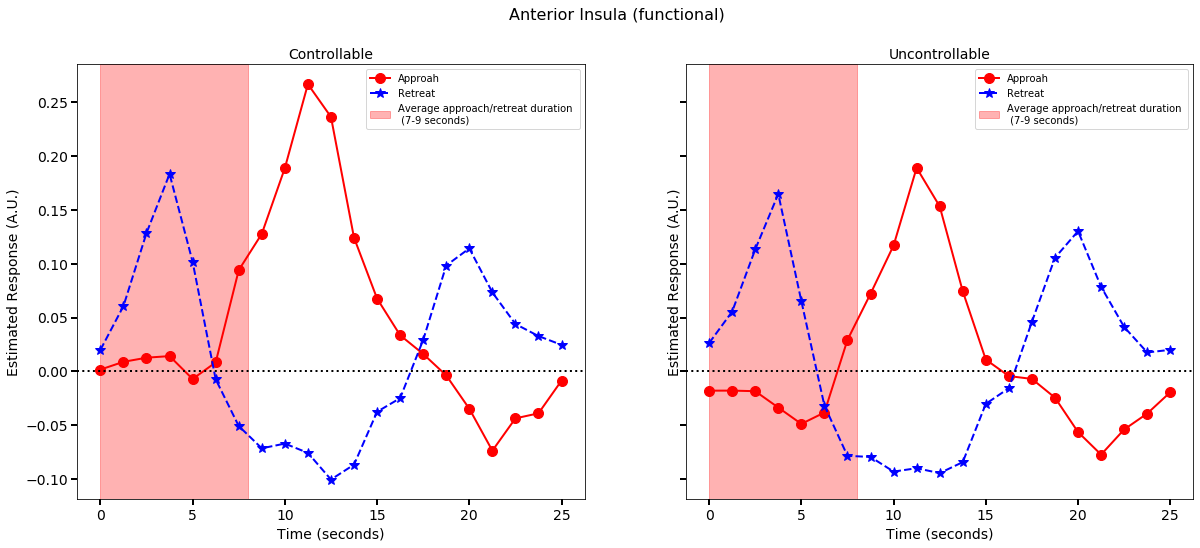

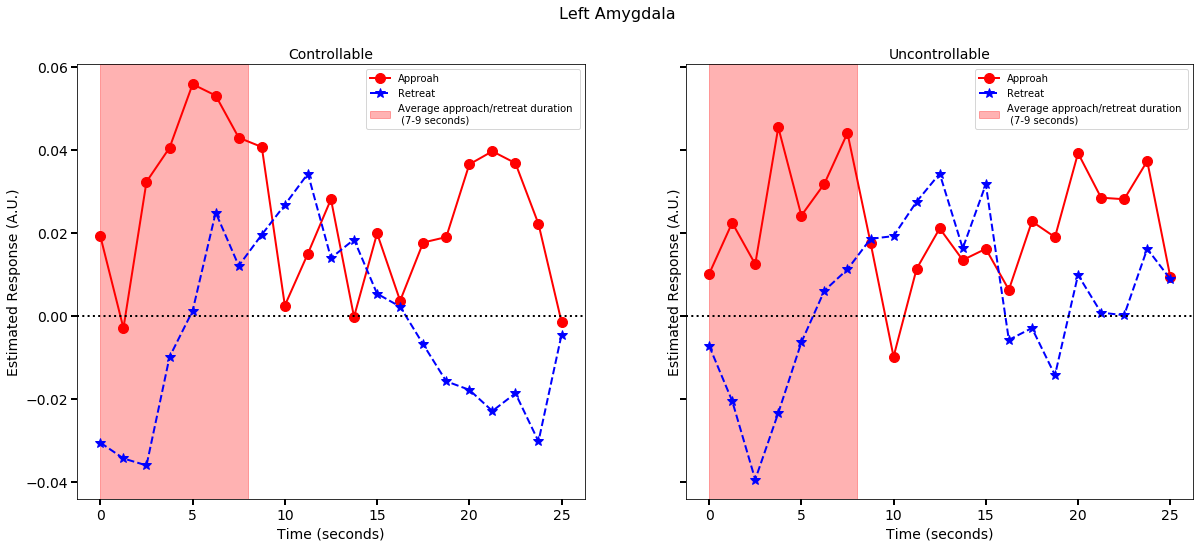

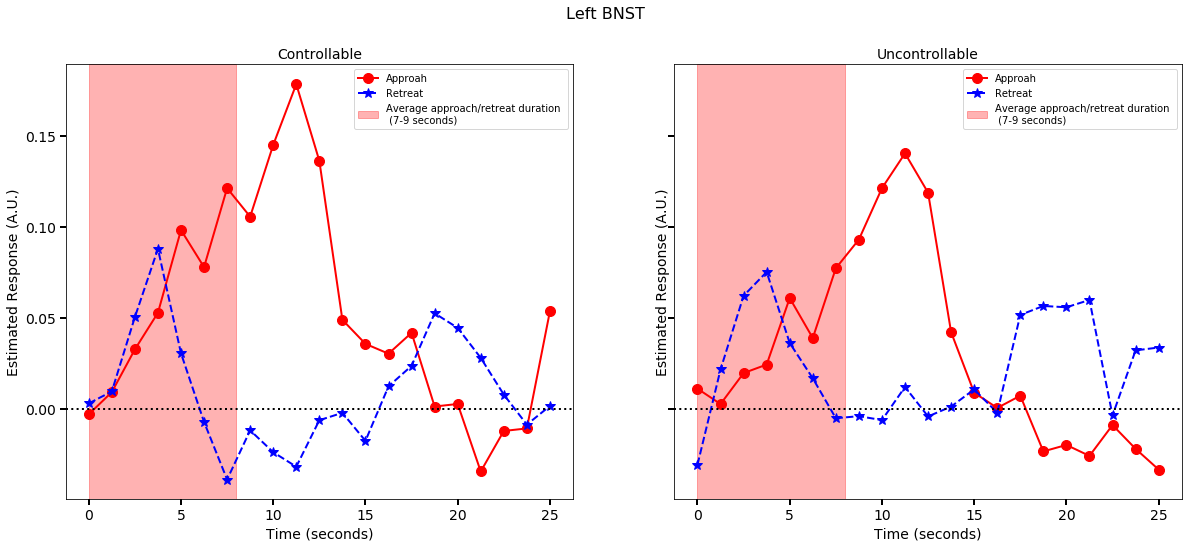

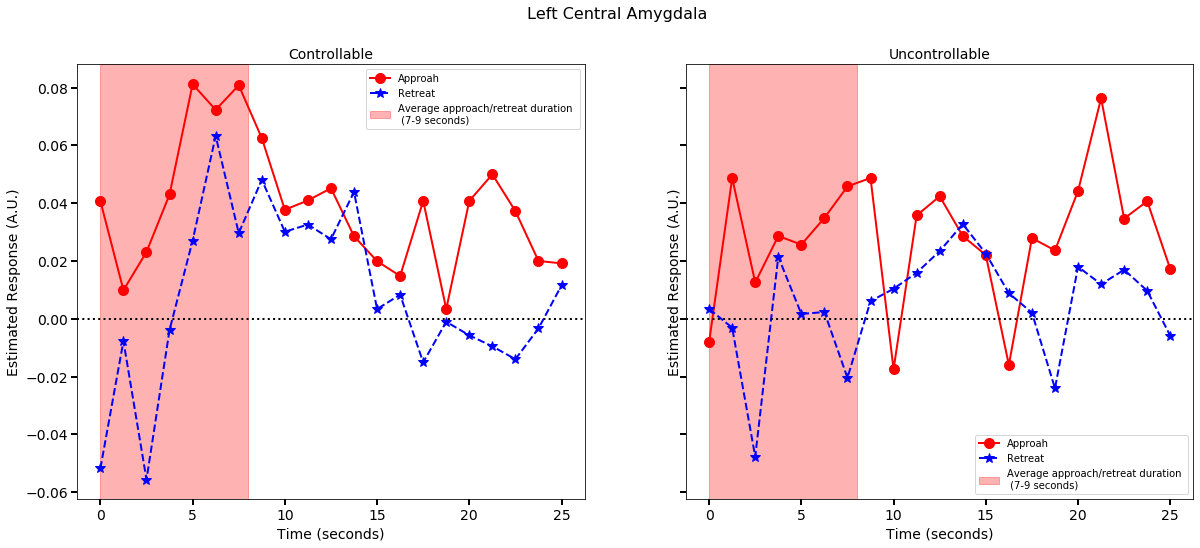

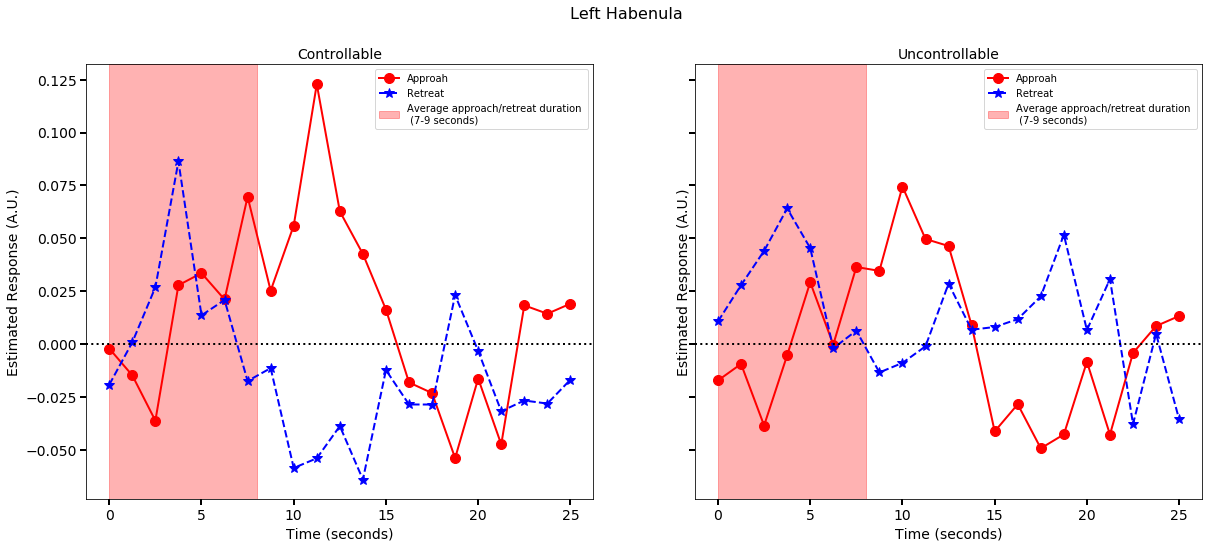

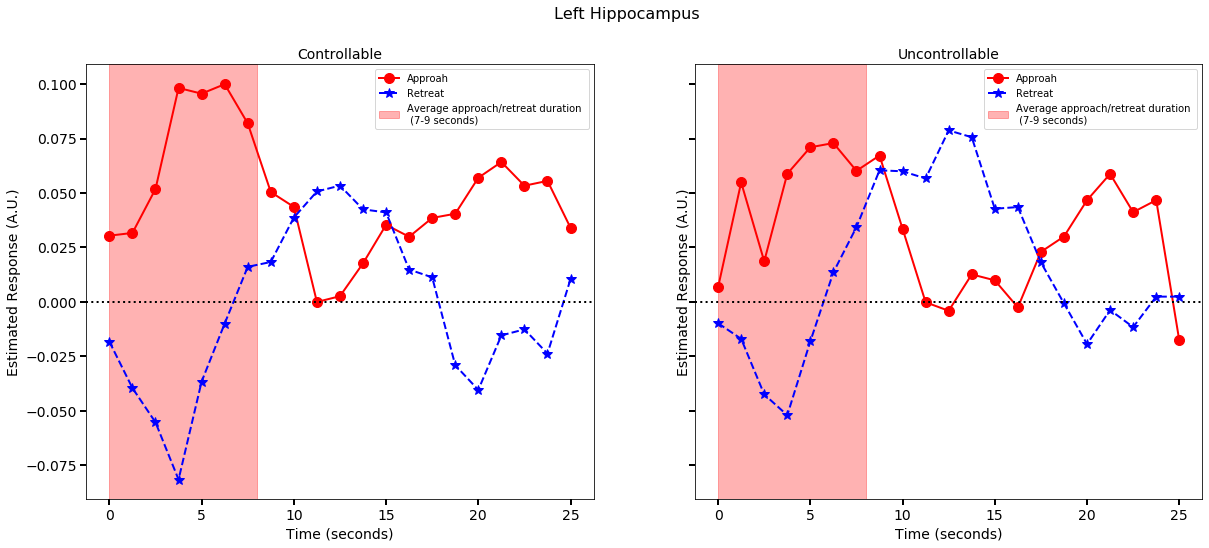

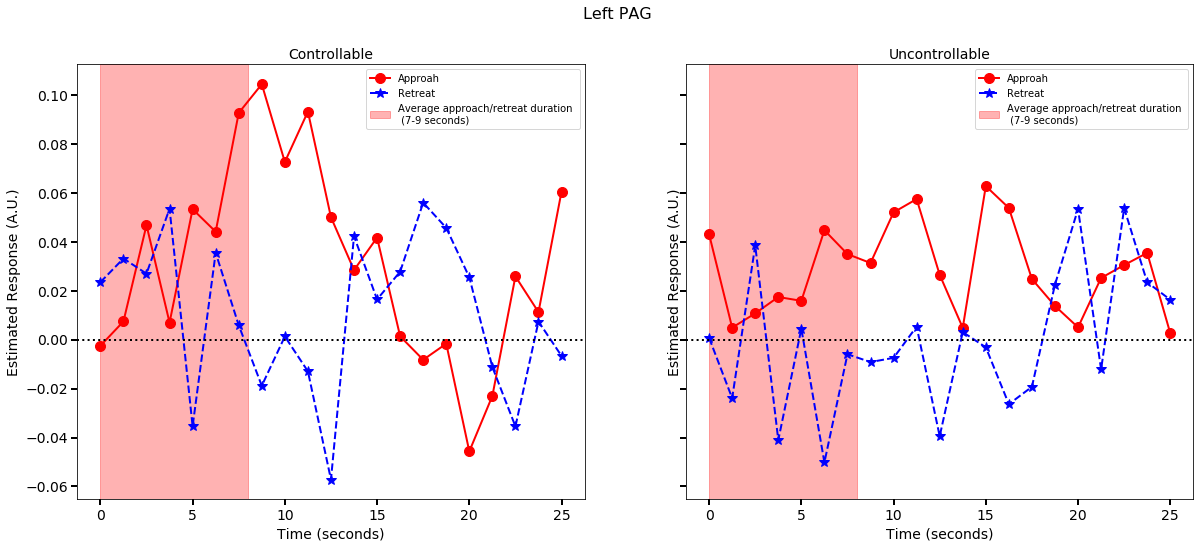

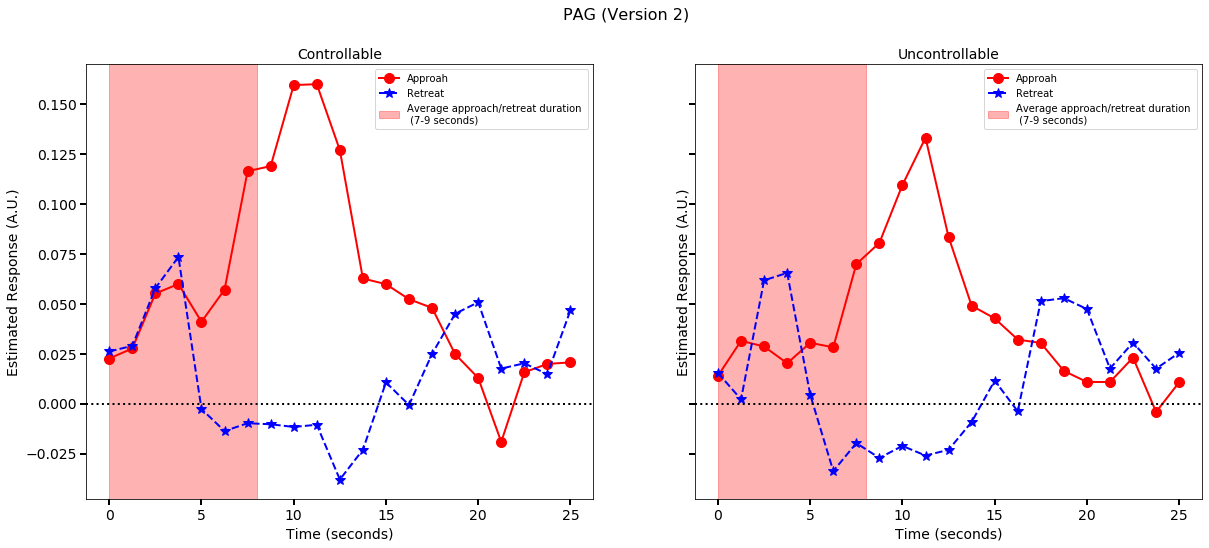

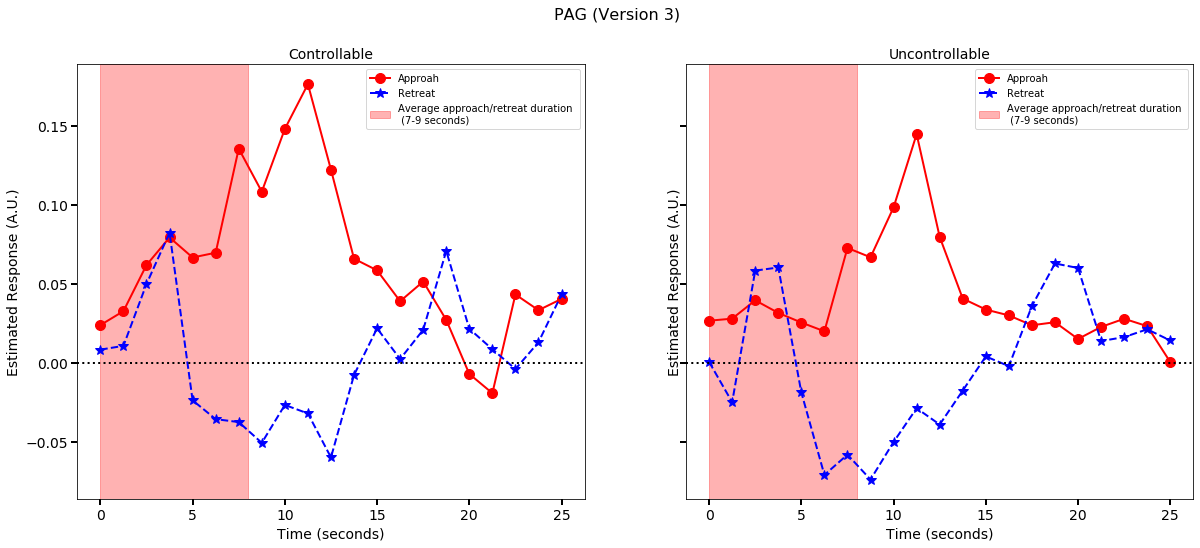

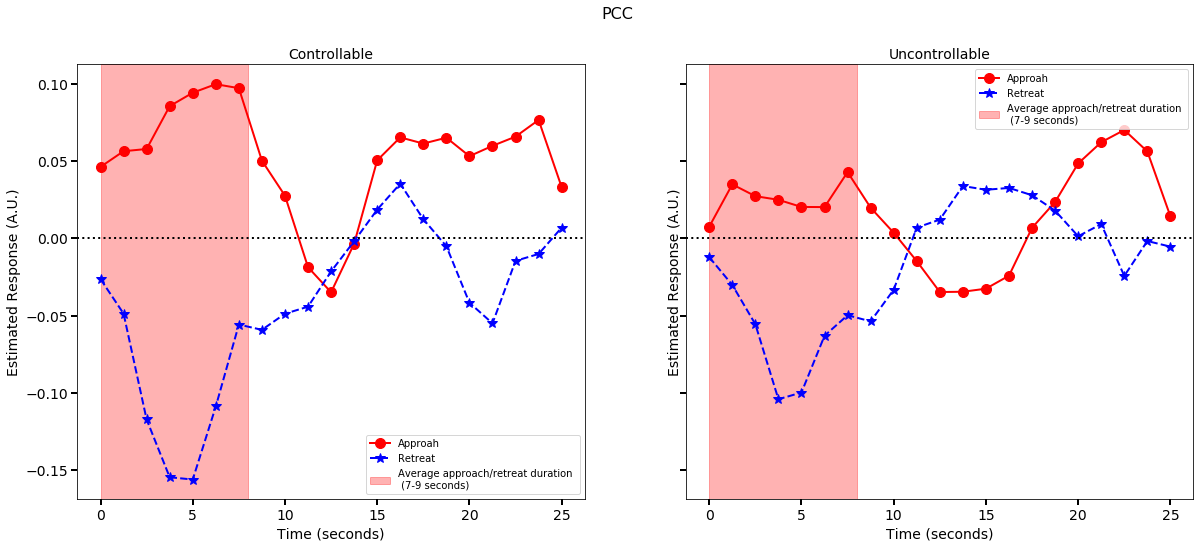

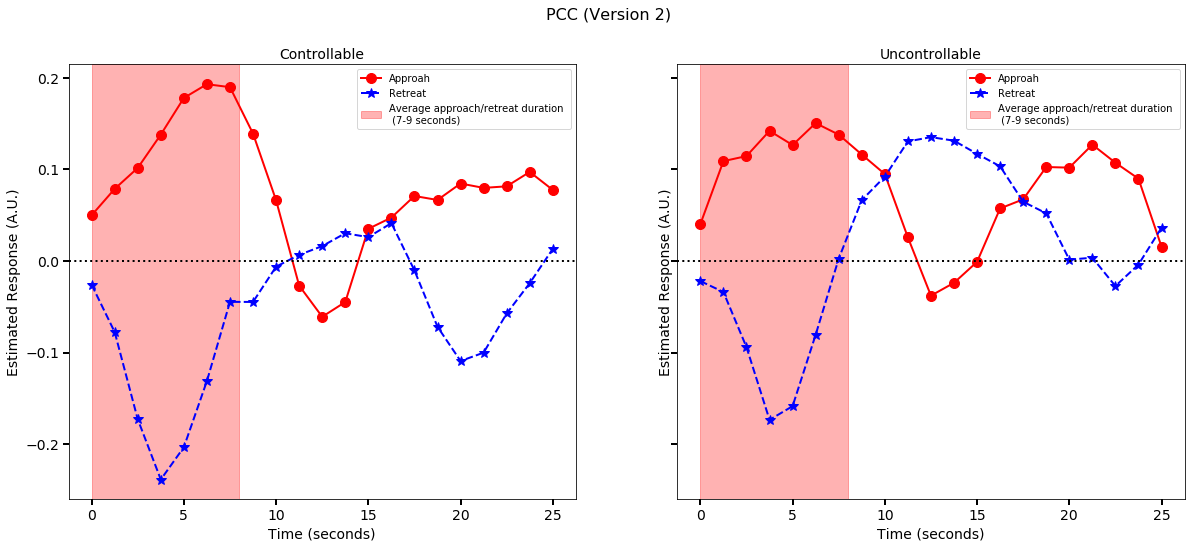

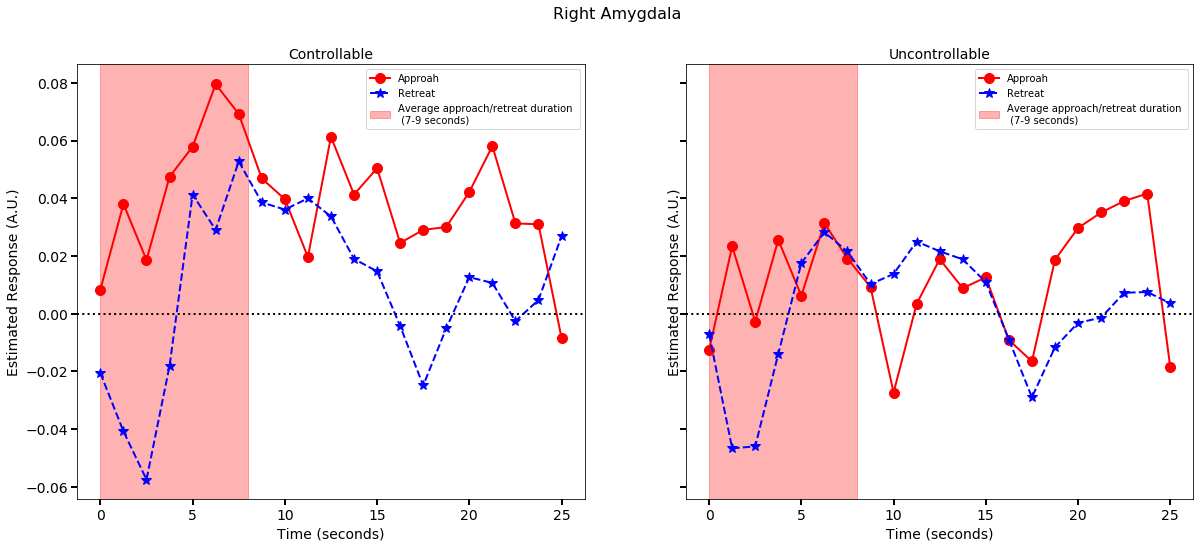

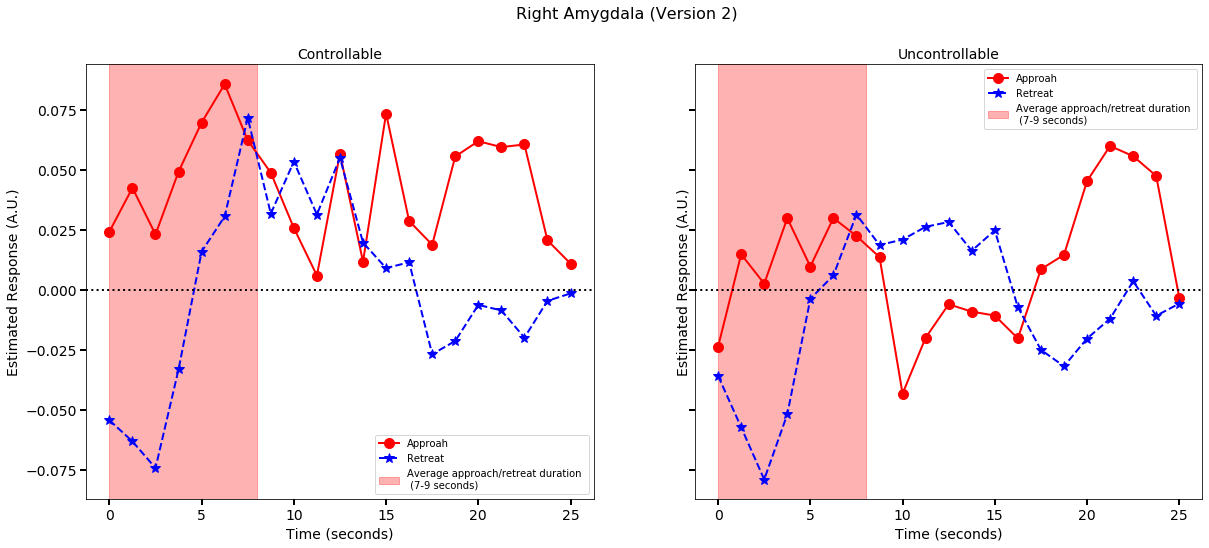

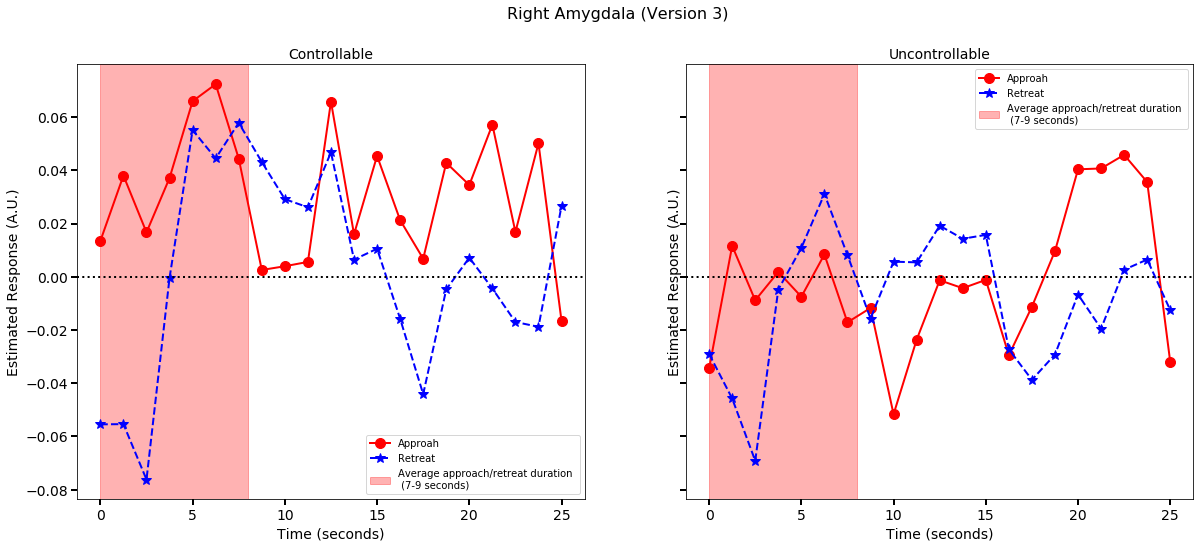

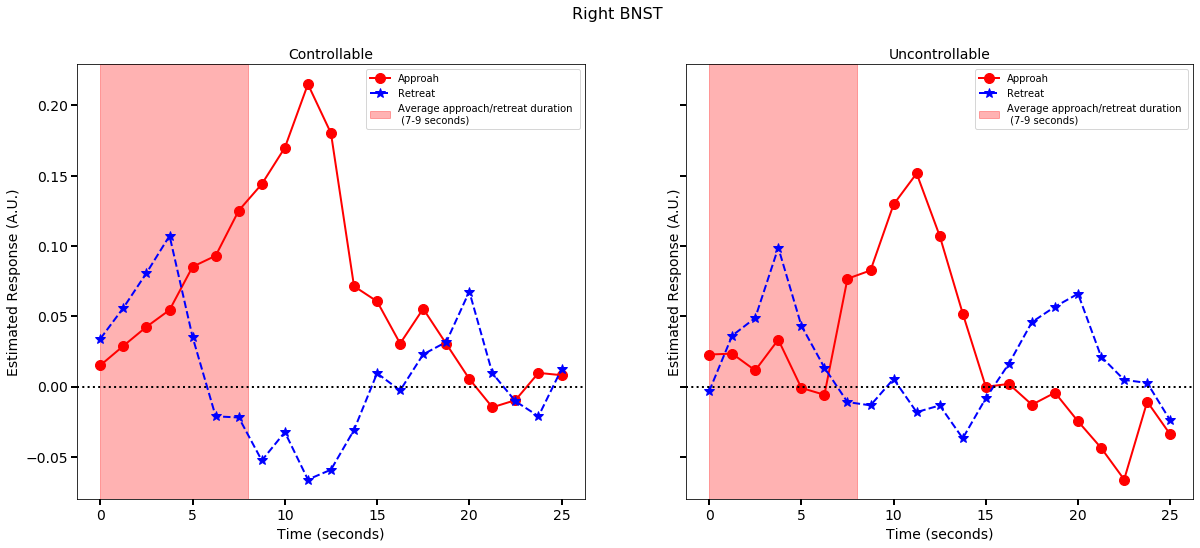

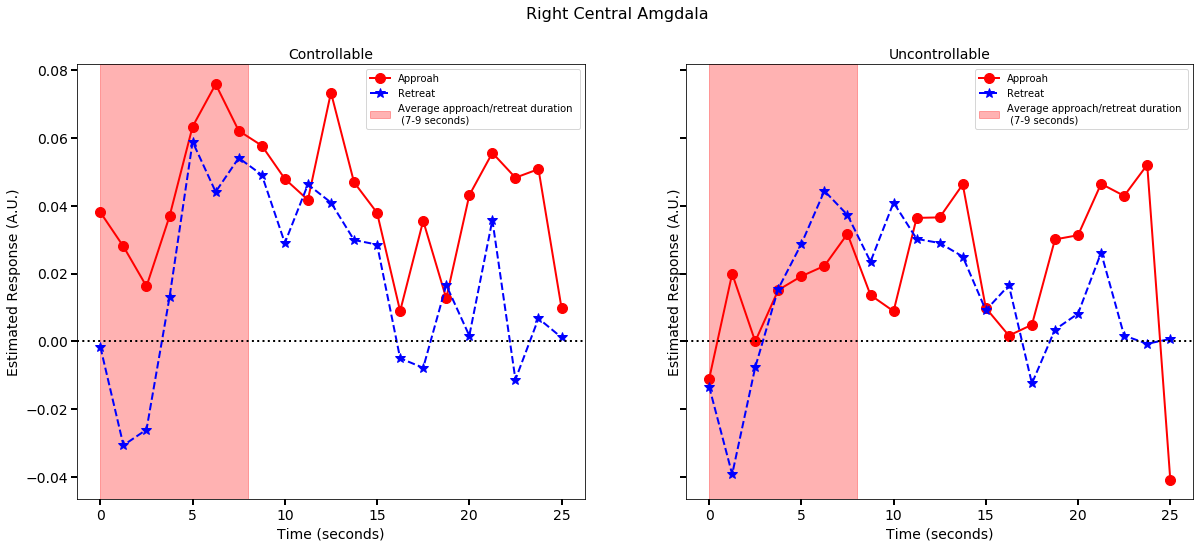

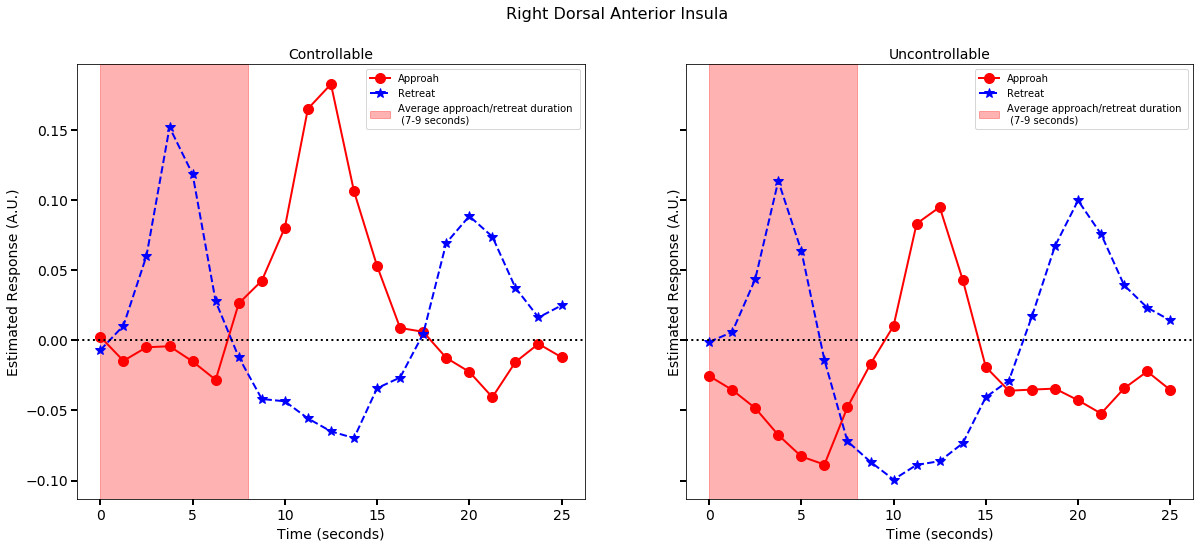

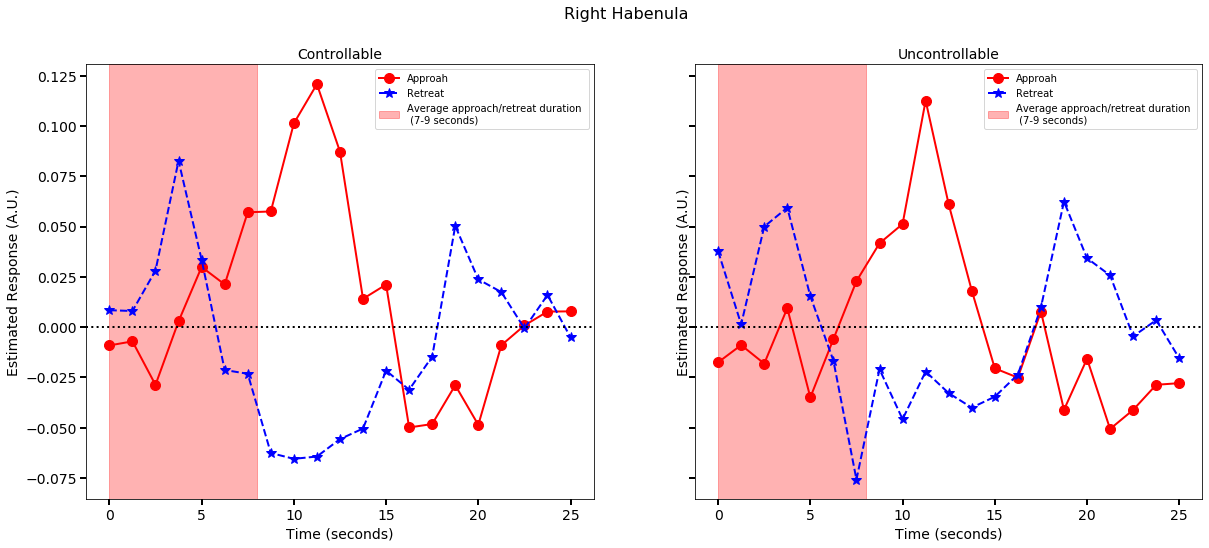

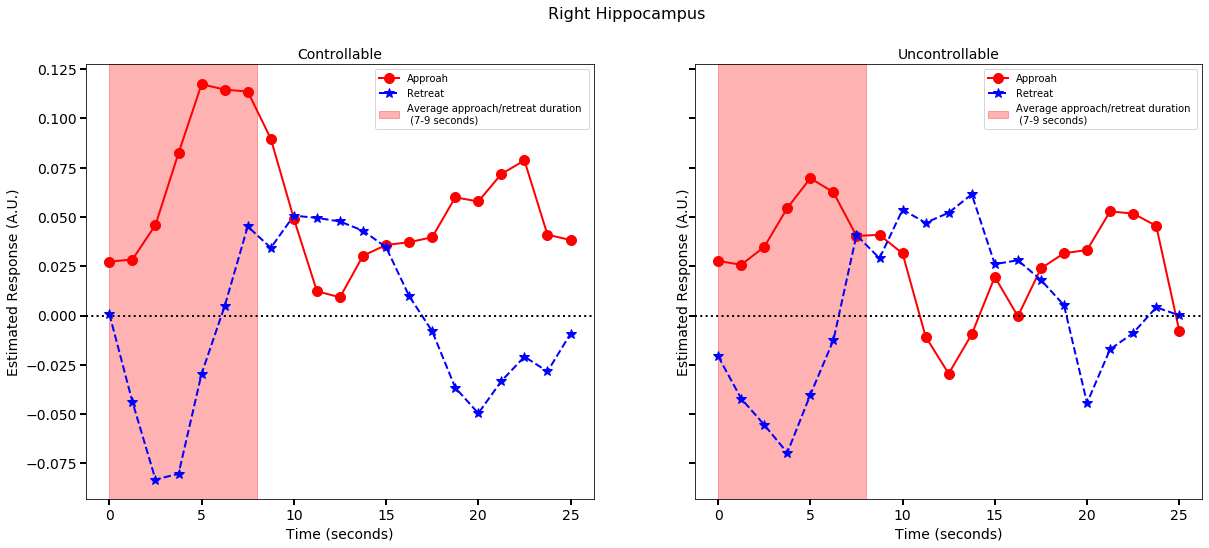

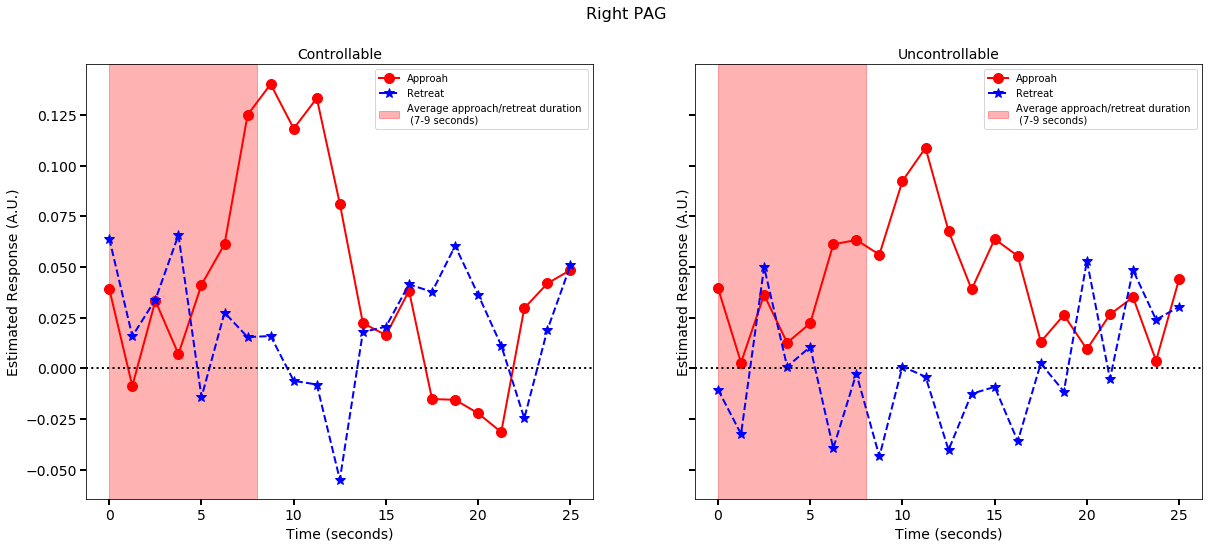

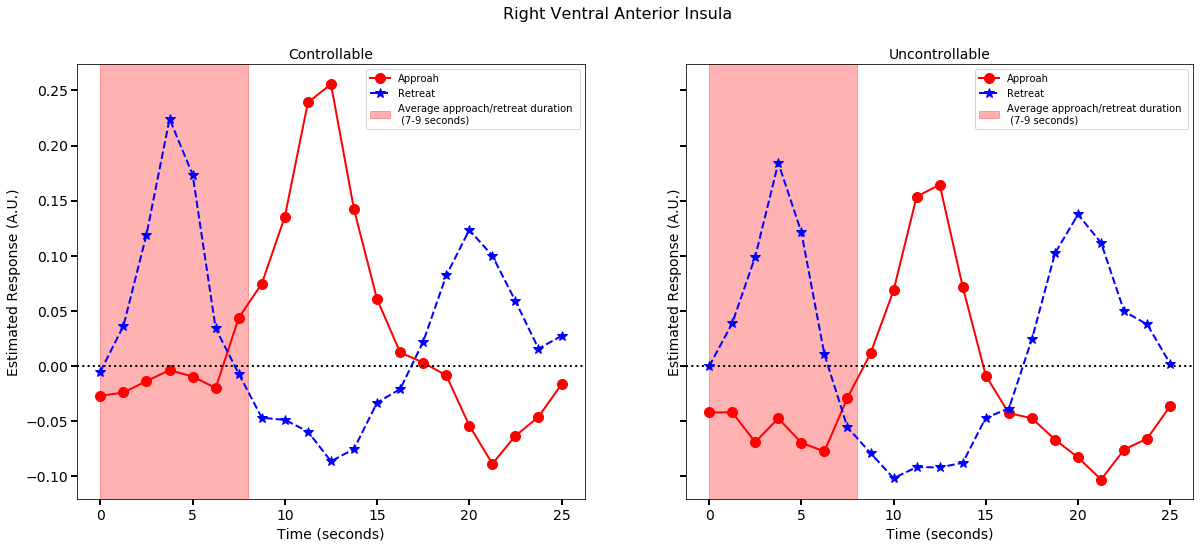

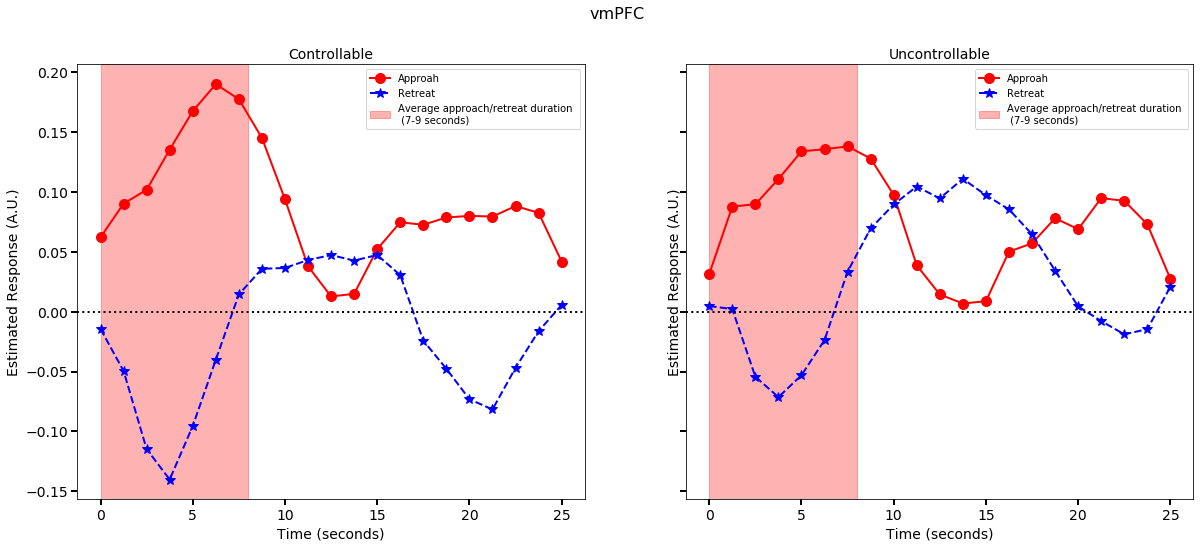

In [14]:
for roi in sorted(rois):
    time = df['Time(s)'].unique()
    fig, axes = plt.subplots(ncols=2,sharey=True, figsize=(20,8))
    for i, group in enumerate(df['Group'].unique()):
        sub_df = df[(df['ROI']==roi) & (df['Group']==group)]
        approach = sub_df['Response'][sub_df['Condition']=='Approach'].values
        retreat = sub_df['Response'][sub_df['Condition']=='Retreat'].values
        axes[i].plot(time,approach,linestyle='-',color='red',linewidth=2, marker='o', markersize = 10, label = 'Approah')
        axes[i].plot(time,retreat,linestyle='--',color='blue',linewidth=2, marker='*', markersize = 10, label = 'Retreat')
        axes[i].axvspan(0, 8, alpha = 0.3, color = 'red', label='Average approach/retreat duration \n (7-9 seconds)')
        axes[i].axhline(0,linestyle=':',color='black',linewidth = 2)
        axes[i].tick_params(direction='out', length=6, width=2, colors='k', labelsize=14)
        axes[i].legend()
        axes[i].set_title(group,fontsize=14)
        axes[i].set_xlabel('Time (seconds)',fontsize=14)
        axes[i].set_ylabel('Estimated Response (A.U.)',fontsize=14)
    _=fig.suptitle(roi,fontsize=16)
    #fig.savefig('figures/{roi}.png'.format(roi=roi),dpi=300)

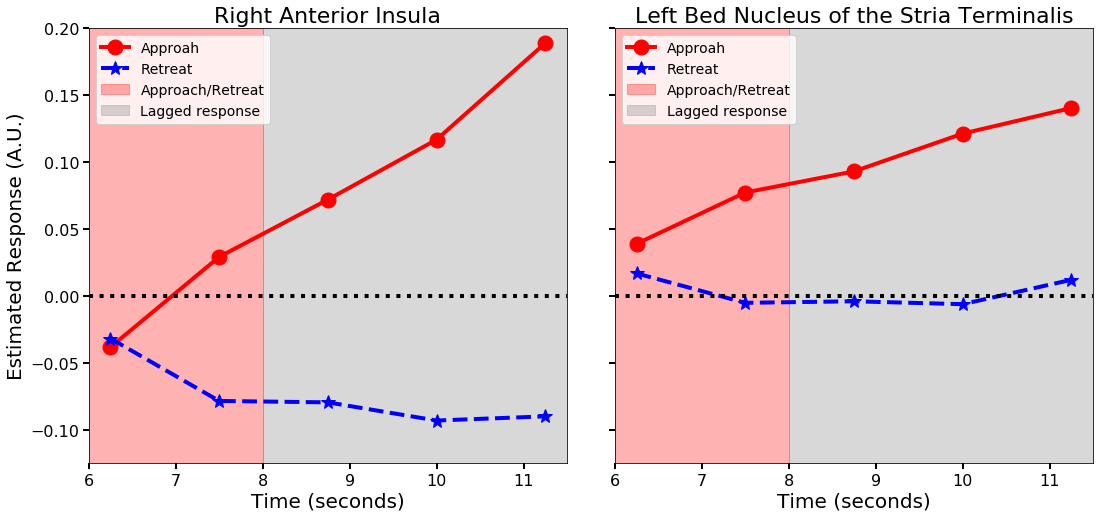

In [10]:
names = ['Right Anterior Insula', 'Left Bed Nucleus of the Stria Terminalis']

fig, axes = plt.subplots(ncols=2,sharey=True,figsize=(18,8))
plt.subplots_adjust(wspace=0.1, hspace=0)
time = df['Time(s)'].unique()
for i,roi in enumerate(['Anterior Insula (functional)','Left BNST']):
    sub_df = df[(df['ROI']==roi) & (df['Group']=='Uncontrollable')]
    approach = sub_df['Response'][sub_df['Condition']=='Approach'].values
    retreat = sub_df['Response'][sub_df['Condition']=='Retreat'].values
    axes[i].plot(time[5:10],approach[5:10],linestyle='-',color='red',linewidth=4, marker='o', markersize = 15, label = 'Approah')
    axes[i].plot(time[5:10],retreat[5:10],linestyle='--',color='blue',linewidth=4, marker='*', markersize = 15, label = 'Retreat')
    axes[i].axvspan(time[3], 8, alpha = 0.3, color = 'r', label='Approach/Retreat')
    axes[i].axvspan(8,12, alpha = 0.3, color = 'gray',label='Lagged response')
    axes[i].axhline(0,linestyle=':',color='black',linewidth = 4)
    axes[i].set_ylim(-0.125,0.2)
    axes[i].set_xlim(6,11.5)
    axes[i].tick_params(direction='out', length=6, width=2, colors='k', labelsize=16)
    axes[i].legend(loc=2,prop={'size': 14})
    axes[i].set_title(names[i],fontsize=22)
    axes[i].set_xlabel('Time (seconds)',fontsize=20)
    if i == 0:
        axes[i].set_ylabel('Estimated Response (A.U.)',fontsize=20)
    #fig.legend(axes[0].get_legend_handles_labels()[1],loc=7,prop={'size': 14})
    fig.savefig('figures/rAI and lBNST estimates resp.png',dpi=300)
    